# DATA PREPROCESSING

In [1]:
#MERGING_DATA
%cd \Users\eaauggr\Downloads\churn


C:\Users\eaauggr\Downloads\churn


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('train_v2.csv')
members_data = pd.read_csv('members_v3.csv')
transactions_data = pd.read_csv('transactions_v2.csv')
user_logs_data = pd.read_csv('user_logs_v2.csv')


In [4]:
train_members = pd.merge(train_data, members_data, on='msno', how='left')
train_mem_trans = pd.merge(train_members, transactions_data, on='msno', how='left')
training_dataset = pd.merge(train_mem_trans, user_logs_data, on='msno', how='left')
training_dataset.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,NaN,NaN,NaN,...,NaN,NaN,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [5]:
training_dataset.isnull().sum()

msno                            0
is_churn                        0
city                       114441
bd                         114441
gender                    7450411
registered_via             114441
registration_init_time     114441
payment_method_id         3510988
payment_plan_days         3510988
plan_list_price           3510988
actual_amount_paid        3510988
is_auto_renew             3510988
transaction_date          3510988
membership_expire_date    3510988
is_cancel                 3510988
date                       237785
num_25                     237785
num_50                     237785
num_75                     237785
num_985                    237785
num_100                    237785
num_unq                    237785
total_secs                 237785
dtype: int64

In [7]:
def preprocessing(data):
    '''This preprocessing function is used to perform outliers removal, nan imputation '''
    
    # nan = 0  in city 
    data['city'] = data['city'].fillna(0)

    
    # removing outliers
    data['bd'] = data['bd'].apply(lambda x: x if (x < 60.0) and (x > 0.0) else np.nan)
    # nan = median age in bd
    data['bd'] = data['bd'].fillna(19.0)

    #  male = 1 in gender
    data['gender'] = data['gender'].replace(to_replace='male', value=1)
    #  male = 2 in gender
    data['gender'] = data['gender'].replace(to_replace='female', value=2)
    #  nan = 0 in gender
    data['gender'] = data['gender'].fillna(0)

    # nan = 0 in registered_via
    data['registered_via'] = data['registered_via'].fillna(0)

    # nan = median date in the registration_init_time
    data['registration_init_time'] = data['registration_init_time'].fillna(20131114.0)
    # converting float date to datetime
    #data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')

    # nan = 0 in payment_method_id
    data['payment_method_id'] = data['payment_method_id'].fillna(0)
    
    # nan = 30 in payment_plan_days
    data['payment_plan_days'] = data['payment_plan_days'].fillna(30.0)

    # nan = 149 in  plan_list_price
    data['plan_list_price'] = data['plan_list_price'].fillna(149.0)

    # nan = 149 in actual_amount_paid
    data['actual_amount_paid'] = data['actual_amount_paid'].fillna(149.0)

    # nan =  2 in is_auto_renew (2 is not mentioned)
    data['is_auto_renew'] = data['is_auto_renew'].fillna(2)

    # nan = median date in transaction_date
    data['transaction_date'] = data['transaction_date'].fillna(20170315.0)
    # converting float date to datetime
    #data['transaction_date'] = pd.to_datetime(data['transaction_date'], format='%Y%m%d')

    # nan = median date in membership_expire_date
    data['membership_expire_date'] = data['membership_expire_date'].fillna(20170419.0)
    # converting float date to datetime
    #data['membership_expire_date'] = pd.to_datetime(data['membership_expire_date'], format='%Y%m%d')

    #  nan =  2 in is_cancel (2 is not mentioned)
    data['is_cancel'] = data['is_cancel'].fillna(2)

    # nan = median date in 'date'
    data['date'] = data['date'].fillna(20170316.0)
    # converting float date to datetime
    #data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

    # removing outliers
    data['num_25'] = data['num_25'].apply(lambda x: x if (x <= 56.0) else np.nan)
    #  nan = 2 in num_25
    data['num_25'] = data['num_25'].fillna(2.0)

    # removing outliers
    data['num_50'] = data['num_50'].apply(lambda x: x if (x <= 21.0) else np.nan)
    # nan = 0 in num_50
    data['num_50'] = data['num_50'].fillna(0)

    # removing outliers
    data['num_75'] = data['num_75'].apply(lambda x: x if (x <= 10.0) else np.nan)
    # nan = 0 in num_75
    data['num_75'] = data['num_75'].fillna(0)

    # removing outliers
    data['num_985'] = data['num_985'].apply(lambda x: x if (x <= 11.0) else np.nan)
    # nan = 0 in num_985
    data['num_985'] = data['num_985'].fillna(0)

    # removing outliers
    data['num_100'] = data['num_100'].apply(lambda x: x if (x <= 75.0) else np.nan)
    # nan = 17 in num_100
    data['num_100'] = data['num_100'].fillna(14.0)

    # removing outliers
    data['num_unq'] = data['num_unq'].apply(lambda x: x if (x <= 69.0) else np.nan)
    #nan = 18 in num_unq
    data['num_unq'] = data['num_unq'].fillna(16.0)

    # removing outliers
    data['total_secs'] = data['total_secs'].apply(lambda x: x if (x <= 19476.59) else np.nan)
    # nan = 4548 in total_secs
    data['total_secs'] = data['total_secs'].fillna(4548.5495)

In [8]:
preprocessing(training_dataset)

In [9]:
training_dataset.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
date                      0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                   0
total_secs                0
dtype: int64

#  Preaparing Dataset

In [10]:
mean_encode = training_dataset.groupby('city')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'city_mean_enc'] = training_dataset['city'].map(mean_encode)

city
0.0     0.072946
1.0     0.061985
3.0     0.124643
4.0     0.127294
5.0     0.125897
6.0     0.123390
7.0     0.103556
8.0     0.135440
9.0     0.120239
10.0    0.128466
11.0    0.108170
12.0    0.131956
13.0    0.121367
14.0    0.119767
15.0    0.120064
16.0    0.106497
17.0    0.086825
18.0    0.108912
19.0    0.132186
20.0    0.079262
21.0    0.138192
22.0    0.115256
Name: is_churn, dtype: float64


In [11]:
del training_dataset["city"]

In [12]:
mean_encode = training_dataset.groupby('gender')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'gender_mean_enc'] = training_dataset['gender'].map(mean_encode)
del training_dataset["gender"]

gender
0.0    0.066529
1.0    0.122148
2.0    0.122622
Name: is_churn, dtype: float64


In [13]:
mean_encode = training_dataset.groupby('payment_method_id')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'payment_method_id_mean_enc'] = training_dataset['payment_method_id'].map(mean_encode)
del training_dataset["payment_method_id"]

payment_method_id
0.0     0.109574
3.0     1.000000
6.0     1.000000
8.0     0.852273
10.0    0.196382
11.0    0.015400
12.0    0.947433
13.0    0.994592
14.0    0.052452
15.0    0.910628
16.0    0.165079
17.0    0.895794
18.0    0.009904
19.0    0.021050
20.0    0.991945
21.0    0.060914
22.0    0.993191
23.0    0.057582
26.0    0.609262
27.0    0.033693
28.0    0.238390
29.0    0.092717
30.0    0.075253
31.0    0.023816
32.0    0.960869
33.0    0.035524
34.0    0.032791
35.0    0.863726
36.0    0.093306
37.0    0.026523
38.0    0.276168
39.0    0.055477
40.0    0.065581
41.0    0.054938
Name: is_churn, dtype: float64


In [14]:
mean_encode = training_dataset.groupby('is_cancel')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'is_cancel_mean_enc'] = training_dataset['is_cancel'].map(mean_encode)
del training_dataset["is_cancel"]

is_cancel
0.0    0.085165
1.0    0.376420
2.0    0.109574
Name: is_churn, dtype: float64


In [15]:
mean_encode = training_dataset.groupby('registered_via')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'registered_via_mean_enc'] = training_dataset['registered_via'].map(mean_encode)
del training_dataset["registered_via"]

registered_via
0.0     0.072946
3.0     0.146431
4.0     0.194327
7.0     0.050228
9.0     0.120079
13.0    0.045631
Name: is_churn, dtype: float64


In [16]:
mean_encode = training_dataset.groupby('is_auto_renew')['is_churn'].mean()
print(mean_encode)
training_dataset.loc[:, 'is_auto_renew_mean_enc'] = training_dataset['is_auto_renew'].map(mean_encode)
del training_dataset["is_auto_renew"]

is_auto_renew
0.0    0.345160
1.0    0.055275
2.0    0.109574
Name: is_churn, dtype: float64


In [17]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('msno') and str(feature_name)!=str('is_churn')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


train_data = normalize(training_dataset)

In [18]:
Y_train = train_data['is_churn'].values
train_data.drop(['is_churn','msno'], axis=1, inplace=True)

In [19]:
X_train = train_data

In [20]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, stratify=Y_train)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train)

In [21]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(2503424, 21) (2503424,)
(12517126, 21) (12517126,)
(625857, 21) (625857,)


In [22]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import log_loss
from datetime import datetime
from sklearn.calibration import CalibratedClassifierCV

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
def result(y_pred,y_pred_proba,y_true,confusion=0,silent=0):
    """
    Function require 3 inputs
    predicted value
    predicted probabilities
    true labels
    final 1 or 0 
    if 1 confusion matrix will be printed
    """
    loss=log_loss(y_true,y_pred_proba)
    if silent==0:
        print("log loss is ",loss)
        print('F1 score is',f1_score(y_true,y_pred))
    if confusion==1:
        cf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.show()
    return loss

def lowest(hyperparameter,loss_all):
    """
    this function return the
    best hyperparameter and lowest loss associated with it
    """
    lowest_loss_index=np.argsort(loss_all)[0]
    lowest_loss=loss_all[lowest_loss_index]
    hyperparameter=hyperparameter[lowest_loss_index]
    print( 'The best hyperparameter is ',hyperparameter,'and the lowest loss associaed with it ',lowest_loss)
    return hyperparameter
def plot_result(hyperparameter,loss_all):
    figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
    sns.scatterplot(x=hyperparameter,y=loss_all)
    plt.plot()

# Logistic Regression L2 with Balanced

Model is training
Done
log loss is  0.6286784815933859
F1 score is 0.31970796537553553
Model is training
Done
log loss is  0.5623560556044606
F1 score is 0.3728465544871795
Model is training
Done
log loss is  0.5340970946734145
F1 score is 0.3562396278895823
Model is training
Done
log loss is  0.5281205241706202
F1 score is 0.3538200417970419
Model is training
Done
log loss is  0.5243709244788876
F1 score is 0.360163487100212
Model is training
Done
log loss is  0.5225897411139936
F1 score is 0.36277244574724604
Model is training
Done
log loss is  0.5222418024747713
F1 score is 0.36376138088012144
Model is training
Done
log loss is  0.5228767112946552
F1 score is 0.36302513050580615
Model is training
Done
log loss is  0.5224336130595739
F1 score is 0.3629037037037036
Model is training
Done
log loss is  0.5211874963502447
F1 score is 0.3636104208035576
The best hyperparameter is  10000 and the lowest loss associaed with it  0.5211874963502447
********************************************


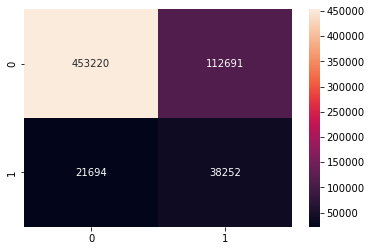

*******************************************


NameError: name 'figure' is not defined

In [24]:
from sklearn.linear_model import LogisticRegression
feature_importance_lr=[]
feature_importance_values_lr=[]
reg=[]
loss_all=[]

#using a sample to find hyperparameter

sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110,class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    print("Done")
    y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
    y_pred=model.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110,class_weight='balanced')
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)

*******************************************
feature importance


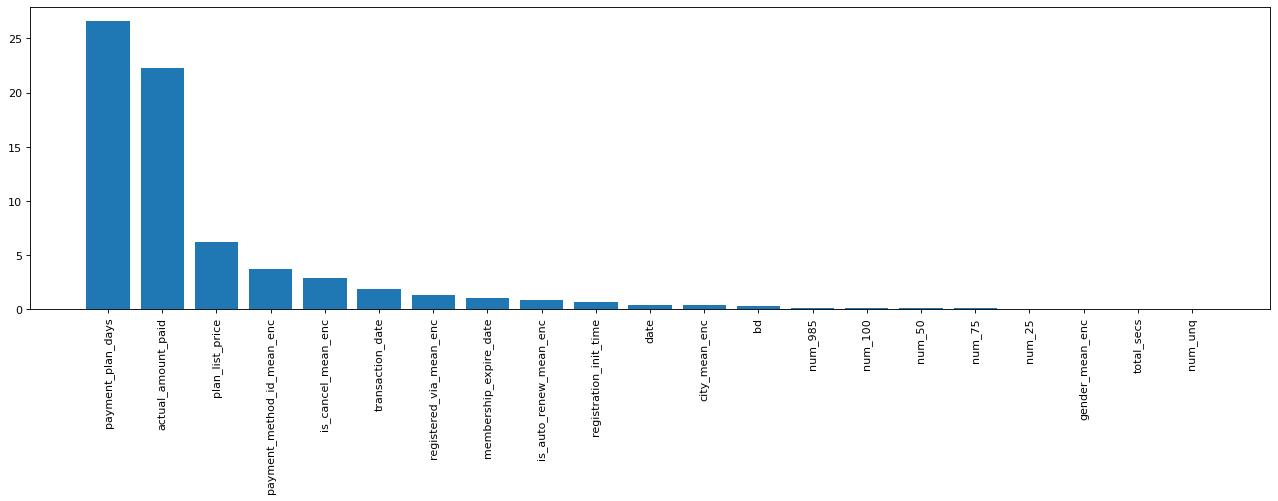

In [29]:
# from matplotlib.pyplot import figure
train_features=X_train.columns
print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lr.append(feature_name)
feature_importance_values_lr.append(feature_importance)

# Logistic Regression L1 with Balanced

Model is training
Done
log loss is  0.5824102012066669
F1 score is 0.3570471336120497
Model is training
Done
log loss is  0.5285746095764338
F1 score is 0.3590149987763236
Model is training
Done
log loss is  0.5236162953539427
F1 score is 0.35924939240979625
Model is training
Done
log loss is  0.5224033960644154
F1 score is 0.3626683073428146
Model is training
Done
log loss is  0.5223763725516005
F1 score is 0.36293847958204506
Model is training
Done
log loss is  0.5223762355362244
F1 score is 0.3629361929024231
Model is training
Done
log loss is  0.5223771676694572
F1 score is 0.3629555903123371
Model is training
Done
log loss is  0.5223771701842654
F1 score is 0.3629555903123371
The best hyperparameter is  10 and the lowest loss associaed with it  0.5223762355362244
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.5224887446813854
F1 score is 0.3627158373230715


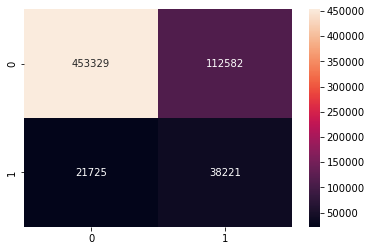

*******************************************
feature importance of top 50 features


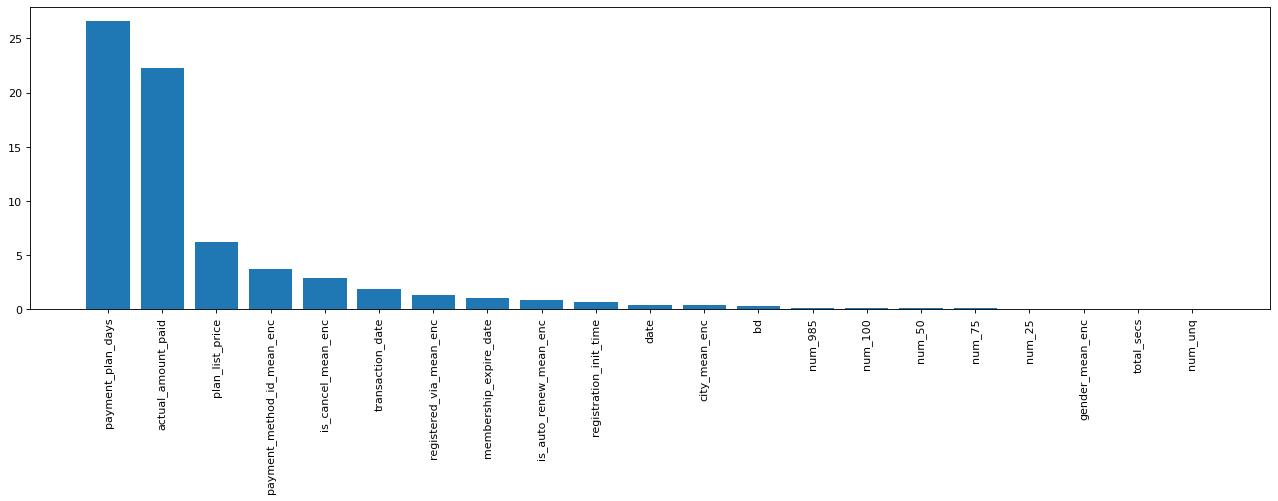

In [28]:
from sklearn.linear_model import LogisticRegression
feature_importance_lr=[]
feature_importance_values_lr=[]
reg=[]
loss_all=[]


#hyperparameter tuning

for i in [10**i for i in range(-4,4)]:
    model=LogisticRegression(C=i,n_jobs=-1,random_state=110,penalty='l1',solver='liblinear',class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    print("Done")
    y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
    y_pred=model.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)


# training model with best hyperparameter

print("********************************************")
print("Training model with best hyperparameter")
model=LogisticRegression(C=hyperparameter,n_jobs=-1,random_state=110,penalty='l1',solver='liblinear',class_weight='balanced')
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")

# visualizing


figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance of top 50 features")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lr.append(feature_name)
feature_importance_values_lr.append(feature_importance)

In [31]:
from lightgbm import LGBMClassifier 
hyp=[]
feature_importance_lgb=[]
feature_importance_values_lgb=[]
loss_all=[]


#hyperparameter tuning

for i in [100,200,500,1000]:
    for j in [30,60,80,100]:
        model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1, num_leaves=j,learning_rate=0.1, n_estimators=i, objective=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20,subsample=1.0, subsample_freq=0, colsample_bytree=1.0,reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1,class_weight='balanced')
        print("Model is training")
        model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
        print("Done")
        y_pred_proba=model.predict_proba(X_cv[:sample_points_cv])
        y_pred=model.predict(X_cv[:sample_points_cv])
        loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
        hyp.append((i,j))
        loss_all.append(loss)
hyperparameter=lowest(hyp,loss_all)
print("********************************************")
print("Training model with best hyperparameter")






Model is training
Done
log loss is  0.26224714076811273
F1 score is 0.577993321672762
Model is training
Done
log loss is  0.24617044194804752
F1 score is 0.5920338366626706
Model is training
Done
log loss is  0.2409815449721794
F1 score is 0.5961977186311787
Model is training
Done
log loss is  0.2371672777226683
F1 score is 0.6034876993856579
Model is training
Done
log loss is  0.24879377786115764
F1 score is 0.5883945322969714
Model is training
Done
log loss is  0.23479593069023075
F1 score is 0.5997054250879633
Model is training
Done
log loss is  0.22906684459251803
F1 score is 0.6080433423629923
Model is training
Done
log loss is  0.22510075314903016
F1 score is 0.6131442106886064
Model is training
Done
log loss is  0.23255879804941146
F1 score is 0.6012780339623158
Model is training
Done
log loss is  0.21715034151800308
F1 score is 0.61938447144214
Model is training
Done
log loss is  0.20970884921720293
F1 score is 0.624451770101763
Model is training
Done
log loss is  0.20340658540

SyntaxError: keyword argument repeated: class_weight (Temp/ipykernel_5868/470791623.py, line 30)

Model is training
Done
log loss is  0.18460986106378
F1 score is 0.6557404266925987


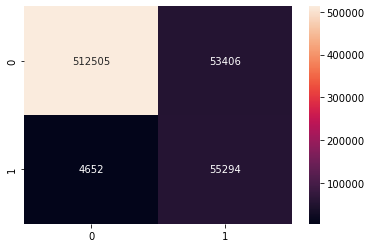

*******************************************


In [33]:
# training model with best hyperparameter

model=LGBMClassifier(boosting_type='gbdt', max_depth=- 1,
               learning_rate=0.1, n_estimators=hyperparameter[0],  num_leaves=hyperparameter[1],
               subsample_for_bin=200000, objective=None, 
               class_weight='balanced', min_split_gain=0.0, 
               min_child_weight=0.001, min_child_samples=20,
               subsample=1.0, subsample_freq=0, colsample_bytree=1.0,
               reg_alpha=0.0, reg_lambda=0.0, random_state=110, n_jobs=- 1)
print("Model is training")
model.fit(X_train,Y_train)
print("Done")
y_pred_proba=model.predict_proba(X_cv)
y_pred=model.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")

feature importance


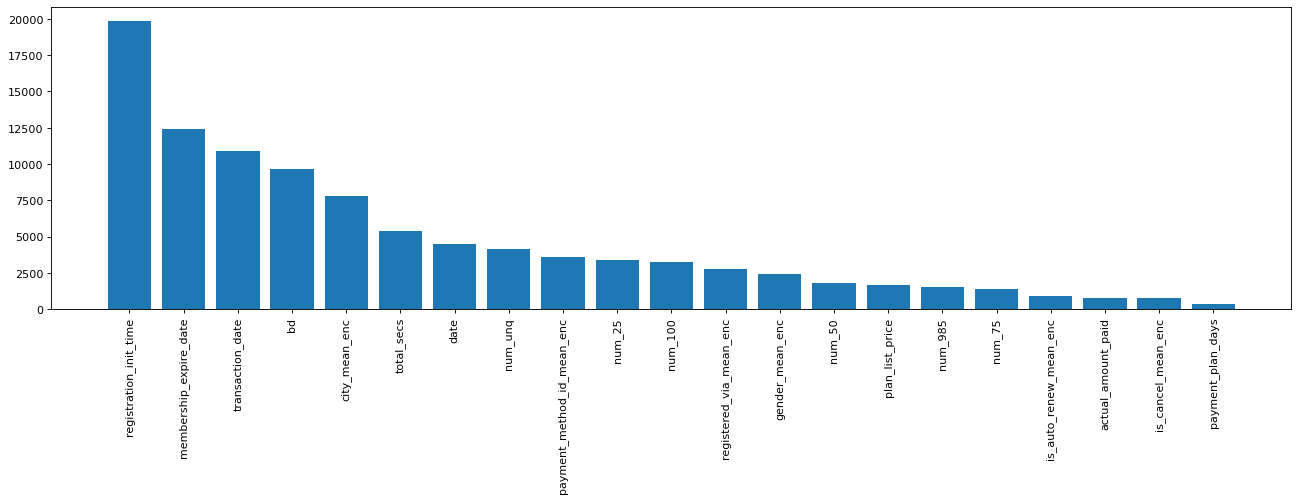

In [35]:
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(model.feature_importances_)[::-1]]
feature_importance=[model.feature_importances_[i] for i in np.argsort(model.feature_importances_)[::-1]]
print("feature importance")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_lgb.append(feature_name)
feature_importance_values_lgb.append(feature_importance)

Model is training
Done
log loss is  0.24059382918890646
F1 score is 0.3738250417580978
Model is training
Done
log loss is  0.2407109005146226
F1 score is 0.37133870650678197
Model is training
Done
log loss is  0.2408845809857559
F1 score is 0.3655424784887746
Model is training
Done
log loss is  0.24641983312141513
F1 score is 0.34348233404710926
Model is training
Done
log loss is  0.25908233997457236
F1 score is 0.2429676766215923
Model is training
Done
log loss is  0.2611125910878892
F1 score is 0.26308849210591967
Model is training
Done
log loss is  0.2614017394597851
F1 score is 0.2612236151291118
Model is training
Done
log loss is  0.26140155940186643
F1 score is 0.2612236151291118
Model is training
Done
log loss is  0.2614015594016007
F1 score is 0.2612236151291118
Model is training
Done
log loss is  0.26140155940195514
F1 score is 0.2612236151291118
The best hyperparameter is  1e-05 and the lowest loss associaed with it  0.24059382918890646
***************************************

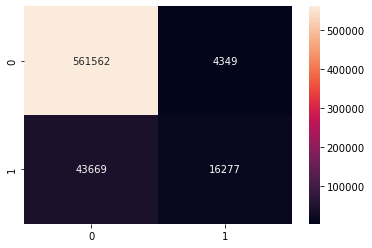

*******************************************
feature importances


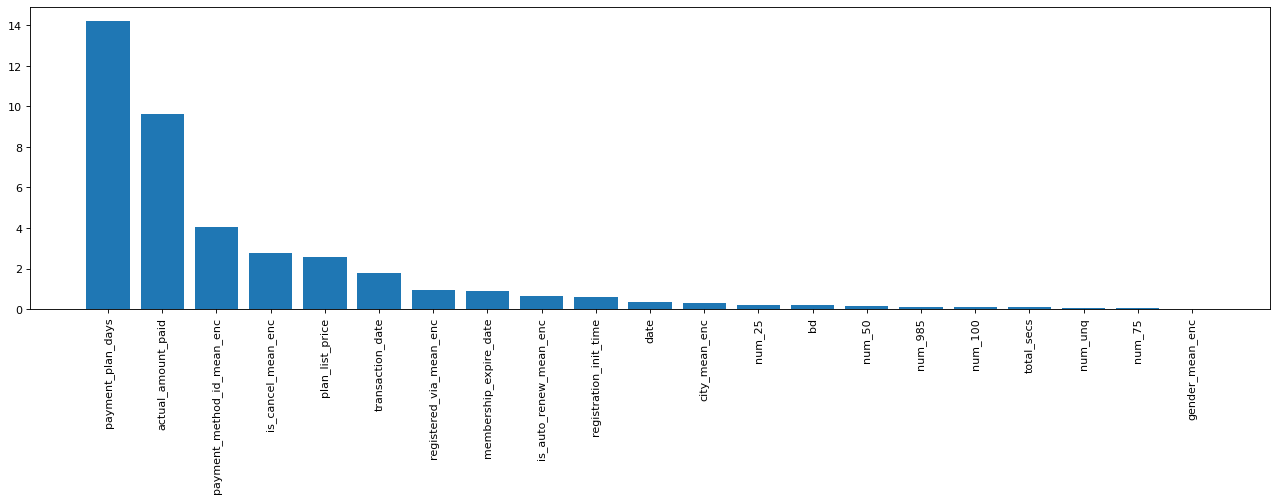

In [42]:
feature_importance_sgd=[]
feature_importance_values_sgd=[]
reg=[]
loss_all=[]

#using a sample to find hyperparameter
sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])

#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,random_state=110,class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    calibration=CalibratedClassifierCV(model,method='isotonic')
    calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
    print("Done")
    y_pred_proba=calibration.predict_proba(X_cv[:sample_points_cv])
    y_pred=calibration.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
    
    
# training model with best hyperparameter

hyperparameter=lowest(reg,loss_all)
print("********************************************")
print("Training model with best hyperparameter")
model=SGDClassifier(loss='log',alpha=hyperparameter,n_jobs=-1,random_state=110,class_weight='balanced')
print("Model is training")
model.fit(X_train,Y_train)
calibration=CalibratedClassifierCV(model,method='isotonic')
calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
print("Done")
y_pred_proba=calibration.predict_proba(X_cv)
y_pred=calibration.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)



# visualizing
print("*******************************************")
figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importances")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_sgd.append(feature_name)
feature_importance_values_sgd.append(feature_importance)

Model is training
Done
log loss is  0.23877381644299592
F1 score is 0.380694955547595
Model is training
Done
log loss is  0.23963043996408157
F1 score is 0.37678891605541975
Model is training
Done
log loss is  0.2417196662473426
F1 score is 0.36836582185900085
Model is training
Done
log loss is  0.2514440265088747
F1 score is 0.279804411299117
Model is training
Done
log loss is  0.2852253093510866
F1 score is 0.0
Model is training
Done
log loss is  0.31641214916264243
F1 score is 0.0
Model is training
Done
log loss is  0.31641214916264243
F1 score is 0.0
Model is training
Done
log loss is  0.31641214916264243
F1 score is 0.0
Model is training
Done
log loss is  0.31641214916264243
F1 score is 0.0
Model is training
Done
log loss is  0.31641214916264243
F1 score is 0.0
The best hyperparameter is  1e-05 and the lowest loss associaed with it  0.23877381644299592
********************************************
Training model with best hyperparameter
Model is training
Done
log loss is  0.2409893

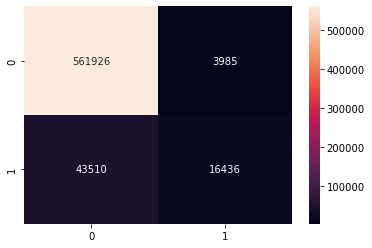

*******************************************
feature importance


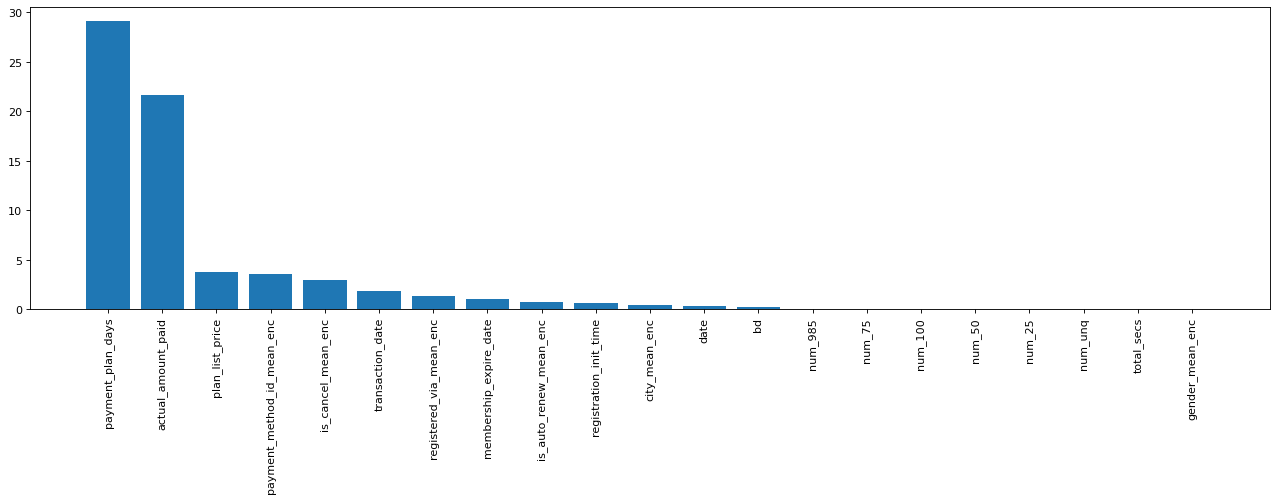

In [46]:
feature_importance_sgd=[]
feature_importance_values_sgd=[]
reg=[]
loss_all=[]


#using a sample to find hyperparameter

sample_points_train=int(0.4*X_train.shape[0])
sample_points_cv=int(0.4*X_cv.shape[0])



#hyperparameter tuning

for i in [10**i for i in range(-5,5)]:
    model=SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,random_state=110, penalty='l1',class_weight='balanced')
    print("Model is training")
    model.fit(X_train[:sample_points_train],Y_train[:sample_points_train])
    calibration=CalibratedClassifierCV(model,method='isotonic')
    calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
    print("Done")
    y_pred_proba=calibration.predict_proba(X_cv[:sample_points_cv])
    y_pred=calibration.predict(X_cv[:sample_points_cv])
    loss=result(y_pred,y_pred_proba,Y_cv[:sample_points_cv])
    reg.append(i)
    loss_all.append(loss)
hyperparameter=lowest(reg,loss_all)

# training model with best hyperparameter


print("********************************************")
print("Training model with best hyperparameter")
model=SGDClassifier(loss='log',alpha=hyperparameter,n_jobs=-1,random_state=110, penalty='l1',class_weight='balanced')
print("Model is training")
model.fit(X_train,Y_train)
calibration=CalibratedClassifierCV(model,method='isotonic')
calibration.fit(X_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])],Y_train[int(0.4*X_train.shape[0]):int(0.5*X_train.shape[0])])
print("Done")
y_pred_proba=calibration.predict_proba(X_cv)
y_pred=calibration.predict(X_cv)
loss=result(y_pred,y_pred_proba,Y_cv,confusion=1)
print("*******************************************")



# visualizing

figure(num=None, figsize=(20,5), dpi=80, facecolor='w', edgecolor='k')
feature_name=[train_features[i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
feature_importance=[np.abs(model.coef_)[0][i] for i in np.argsort(np.abs(model.coef_)[0])[::-1]]
print("feature importance")
plt.bar(feature_name[:50],feature_importance[:50])
plt.xticks(rotation=90)
plt.plot()
feature_importance_sgd.append(feature_name)
feature_importance_values_sgd.append(feature_importance)